<a href="https://colab.research.google.com/github/SAI-CHANDRA415/MLINTERNSHIP/blob/master/Copy_of_MLINTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MARKETING CAMPIGN FOR BANKING PRODICTS

* Goal of this model is to predict the likelihood of the customer to buy a personal loan from the bank using the dataset of the 5000 members.

## 1.IMPORTING DIRECTORIES AND LIBRARIES

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## UPLOADING FILES

In [67]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


## 1.1 Loading the data

In [68]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [69]:
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [70]:
dataset.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer ($000)
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month ($000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional
* Mortgage: Value of house mortgage if any. ($000)
* Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?


## 1.2 Checking the types of data and basic summary statistics

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


As per the information, Dataset does not contain any null values(Empty Cells).

In [72]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



* All the columns are numerical values.
* Experience is the only column with negative values.



In [73]:
dataset.shape

(5000, 14)



*  There are 5000 rows and 14 columns in the dataset



# 2.Cleaning of the data

In [74]:
dataset[dataset['Experience']<0]['Experience'].count()

52

*  As the Experience cannot have the negative values, we know that 'Experience' column has false Data.

In [75]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

* No Null value is present in the dataset

In [76]:
#dropping the 'Experience' columns from the dataset.

dataset.drop(['Experience'] , axis=1 ,inplace=True)

* As we know that Experience will be directly correlated and co-existant along with the age, it will be better to drop the 'Experience' Column.

In [77]:
dataset.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [78]:
#Dropping the Online column as it is irrelavent for predicting a person buy a new loan.
dataset.drop(['Online'],axis=1,inplace=True)

* Whether a coustomer having online banking facilities or not is not going to be helpful for predicting customer buys the loan or not.
So removing the online colomn doesnt affect Prediction.

In [79]:
dataset.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,1


# 3.EDA

# 3.1

In [80]:
#Counting the number of unique values in each column.
dataset.nunique()

ID                    5000
Age                     45
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
CreditCard               2
dtype: int64

* As we can see that ID has a Unique value for every row and sanction Personal Loan is not dependent on ID, so it's better to drop the column.
* In the same way, ZIP code also doesn't hold any relevance for a customer to buy a Personal Loan, so better to drop that too for building good model.

In [81]:
#Dropping 'ID' and 'ZIP Code' columns from the data.
dataset.drop(['ID','ZIP Code'], axis =1 ,inplace=True)
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0
1,45,34,3,1.5,1,0,0,1,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


# 3.2

In [82]:
# Counting the number of people 0 mortgage
dataset[dataset['Mortgage']==0]['Mortgage'].count()

3462

* Number of People with no house Mortage Value.

# 3.3

In [83]:
#counting the number of people with zero credit card spending per month
dataset[dataset['CCAvg']==0]['CCAvg'].count()

106

* No. of people not  using credit cards.

# 3.4 value counts of all categorical columns

In [84]:
# value count of Family column 
dataset['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [85]:
# value Count of Education column
dataset['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [86]:
# value Count of Personal Loan column.
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [87]:
# value Count of CD Account column.
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [88]:
# value count of Securities Account column.
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

# 3.5
# UNIVARIATE ANALYSIS

* Univariate variables are the one which are continuos but involves only one particular variable.

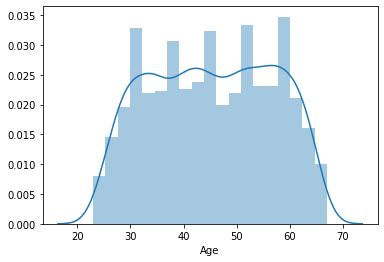

In [89]:
# graph of the 'Age' category
sns.distplot(dataset['Age'])

* Age variable is contionus and normalized in nature.

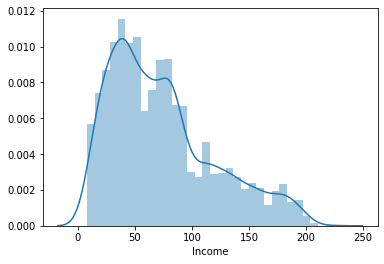

In [90]:
#graph of the 'Income' category
sns.distplot(dataset['Income'])

* Income variable is Continuos but right skewed in nature.

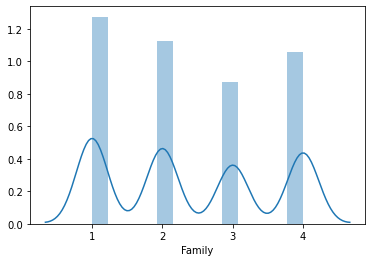

In [91]:
# graph of 'Family' category
sns.distplot(dataset['Family'])

* from above graph ,Data is normalised in nature.

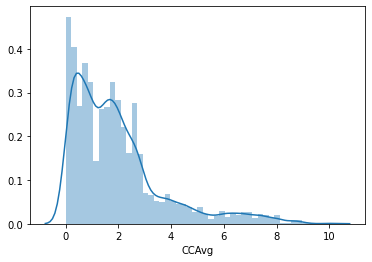

In [92]:
# graph of 'CCAvg' category
sns.distplot(dataset['CCAvg'])

* CCAvg is continuos in nature but was Right skewed.

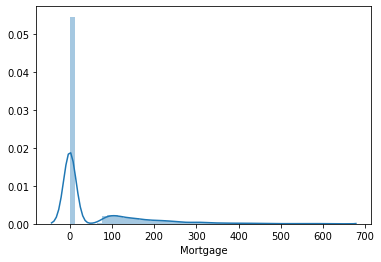

In [93]:
# graph of 'Mortgage' category
sns.distplot(dataset['Mortgage'])

* from the graph, we can conclude that no. of people without any house mortgage value more in number.

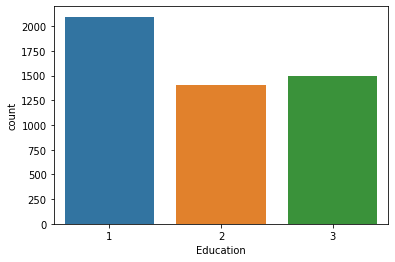

In [94]:
#graph of value count of 'Education' category
sns.countplot(dataset['Education'])

* from above graph , we can say that personal loan is mostly taken by the people who are single.

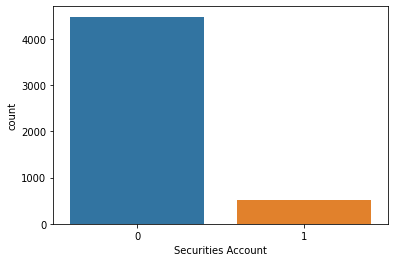

In [95]:
# graph of 'Securities account' Category
sns.countplot(dataset['Securities Account'])

* From the grpah we can conclude that, people without securities account are more in number.

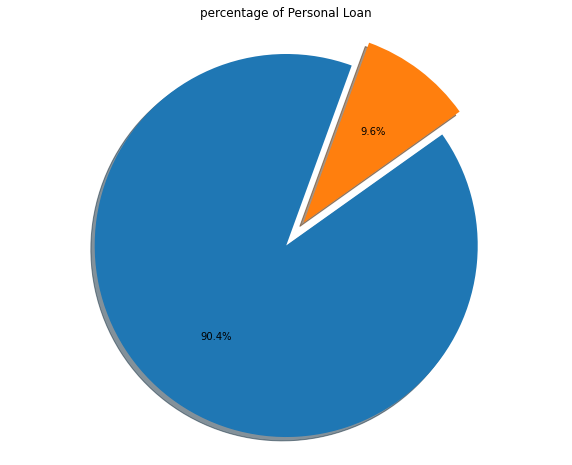

In [96]:
# pie chart of 'Personal loan' category
temp = pd.DataFrame(dataset['Personal Loan'].value_counts()).reset_index()
temp.columns = ['Labels', 'Personal Loan']
fig1, ax1 = plt.subplots(figsize=(10,8))
explode = (0, 0.15)
ax1.pie(temp['Personal Loan'], explode = explode, autopct = '%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("percentage of Personal Loan")
plt.show()

* As per the per the chart, 9.6% of the people only choose to buy the personal loan from the bank. Which means the must be able to predict around 480 members from the dataset of 5000 members.

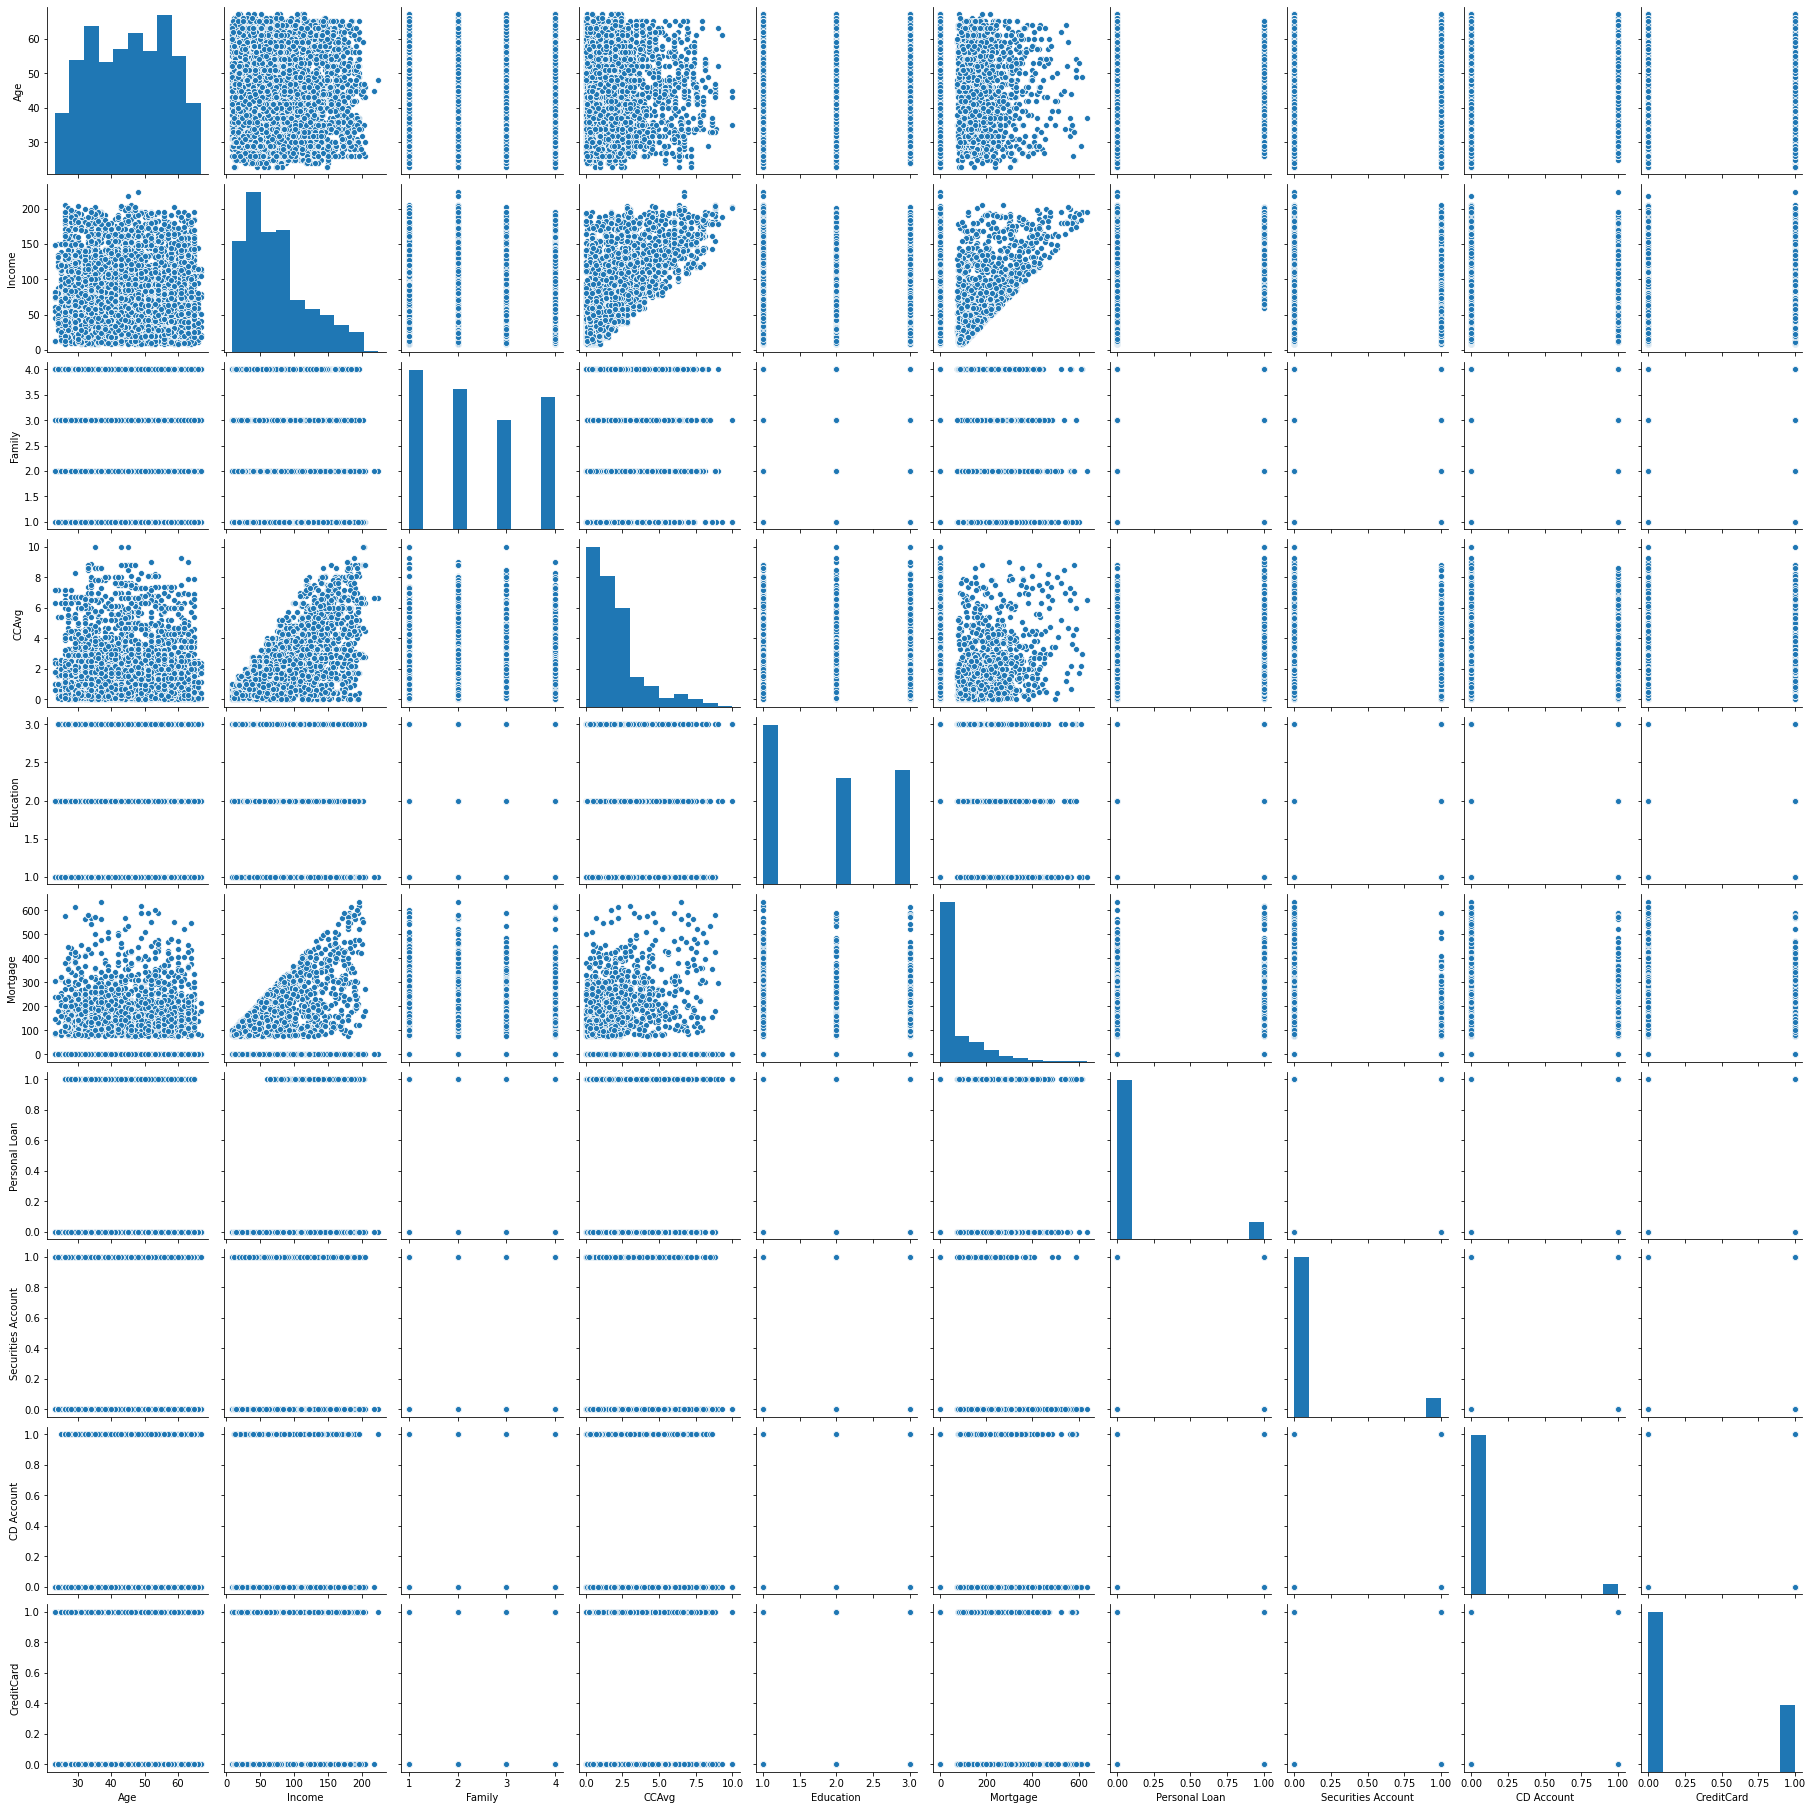

In [38]:
sns.pairplot(dataset)

* plots of each and every variable against all other variables.

# MULTIVARIATE ANALYSIS

* Multivariate variables are the one which are dependent on other variables. In Multivariate analysis, we use two or more variables for data processing.

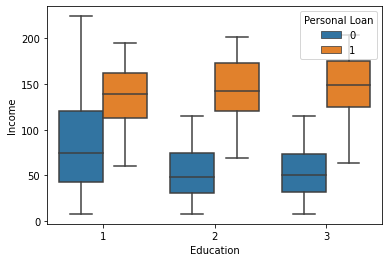

In [97]:
sns.boxplot(x=dataset['Education'],y=dataset['Income'],hue=dataset['Personal Loan'])

* from the above graph we can say that, people with lower education and lower income are not tend to buy a personal loan, whereas people with higher income buys a personal loan from bank among all the education levels equally.

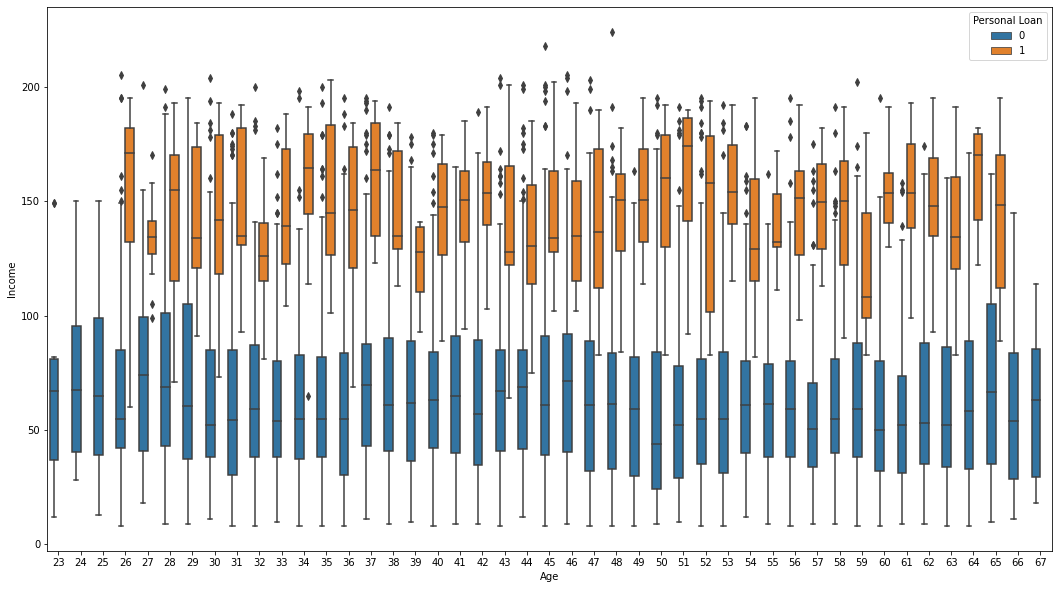

In [98]:
plt.figure(figsize=(18,10))
sns.boxplot(x=dataset['Age'],y=dataset['Income'],hue=dataset['Personal Loan'])

* Among all the Age groups, people with higher Income are more interested to buy personal loan.

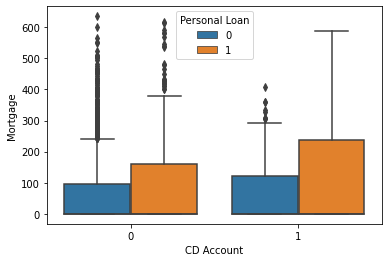

In [99]:
sns.boxplot(x=dataset['CD Account'],y=dataset['Mortgage'],hue=dataset['Personal Loan'])

* In Both the cases of having a CD account and not having a CD account,
people who have a high mortagage value are more prior to buy a personal loan.

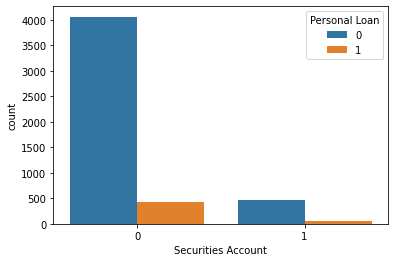

In [100]:
sns.countplot(x=dataset['Securities Account'],hue=dataset['Personal Loan'])

* Very less no. of people who have a securities account are accepted the loan.

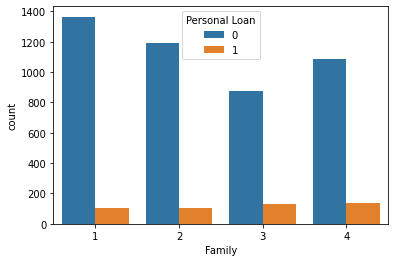

In [101]:
sns.countplot(x=dataset['Family'],hue=dataset['Personal Loan'])

* A very negligible amount of people are tending to take loan who has a bigger family.

# CORRELATION CHART OF THE DATA

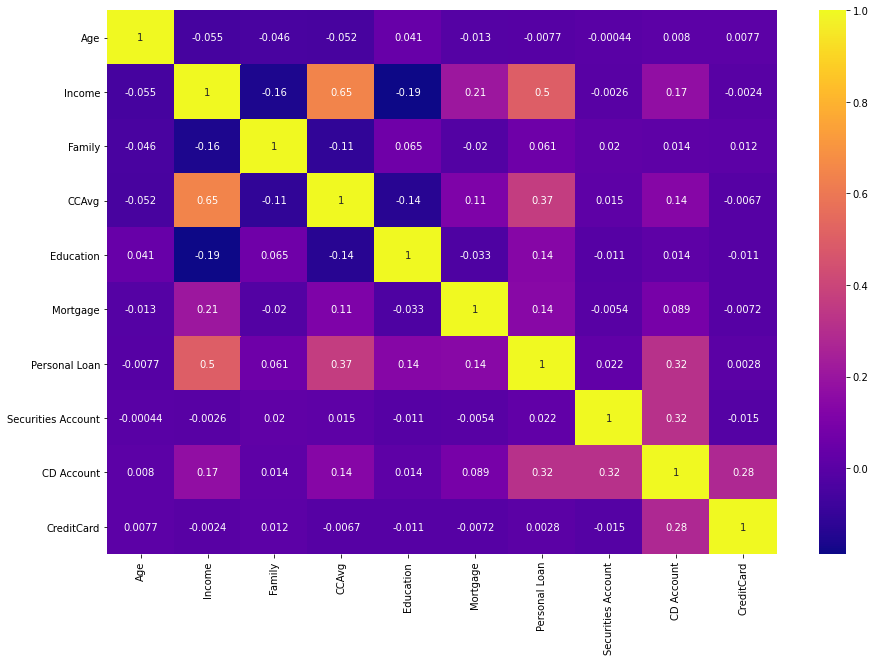

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap = 'plasma',annot=True).figsize=(15,10)

* correalation of a variable with every other variable.

## 4.TRANSFORMATIONS

* The Variables which are skewed and variables with outliers should be transformed for normalising them

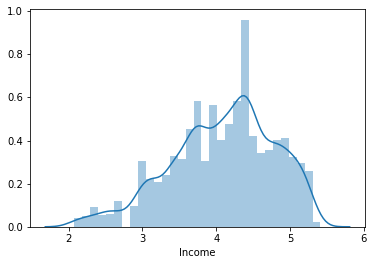

In [103]:
#applying log transform for the 'Income'
pts = np.log(dataset['Income'])
sns.distplot(pts)

* Income Variable which was right skewed is been normalised.

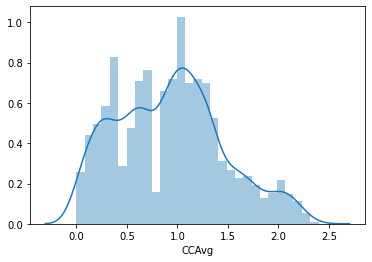

In [104]:
#applying log transform for 'CCAvg'
pts = np.log(dataset['CCAvg']+1)
sns.distplot(pts)

* 'CCAvg' which was previously right skewed is been now normalised

In [105]:
# Making X and Y features from the dataset
data_X = dataset.loc[:,dataset.columns != 'Personal Loan']
data_Y = dataset['Personal Loan']

* Dividing the dataset into features of two sets.
  data_X = [Age, Income, Family, CCAvg, Education, Mortgage, Securities account, CD account, Credit Card]
  data_Y = [ Personal Loan] 

In [106]:
# applying transform for the 'Mortgage' by using binning technique.
data_X["Mortgage_Int"] = pd.cut(data_X['Mortgage'],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
data_X.drop(['Mortgage'],axis= 1, inplace= True)
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0
1,45,34,3,1.5,1,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0
4,35,45,4,1.0,2,0,0,1,0


Mortgage has been normalised by transformation.

## 5.Normalising and Splitting

In [107]:
# Splitting of data into training and test set
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X ,data_Y ,test_size=0.30 , stratify=data_Y ,random_state=0)
print(train_X.shape,train_Y.shape)
print(test_X.shape,test_Y.shape)

(3500, 9) (3500,)
(1500, 9) (1500,)


After Normalising the data, Data has to be split into training and testing sets of both the featured sets namely dataset_X and dataset_y into (train_X , test_X) and (train_Y , test_Y).

## 6.Applying Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [109]:
model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
predict_y=model.predict(test_X)
print(predict_y)

[1 0 0 ... 0 0 0]


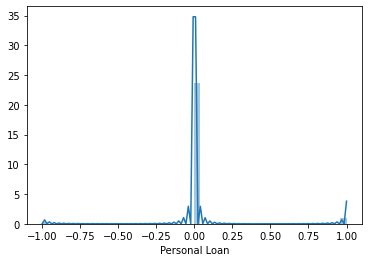

In [111]:
sns.distplot((test_Y - predict_y),bins=50)

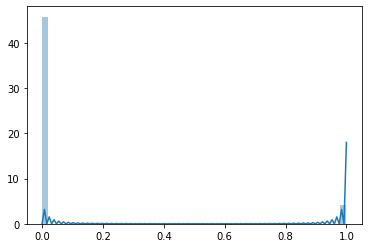

In [112]:
sns.distplot((test_Y,predict_y))

* Using logistic Regression method, we had successfully estimated the likelihood of a person of buying a loan from bank.
Let's look at the method and check the workability of the methods which are more accurate and precise.

## 7.Metrics

In [113]:
from sklearn import metrics
print('Mean Absolute Error',metrics.mean_absolute_error(test_Y,predict_y))

print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(test_Y,predict_y)))

print('Logarithemic Loss',metrics.log_loss(test_Y,predict_y))

print('R2 value', metrics.r2_score(test_Y,predict_y))

print('Recall value', metrics.recall_score(test_Y,predict_y))

print('Precision value', metrics.precision_score(test_Y,predict_y))

print('Accuracy of test data:', metrics.accuracy_score(test_Y,predict_y))

Mean Absolute Error 0.05
Root Mean Squared Error 0.22360679774997896
Logarithemic Loss 1.7269500141095577
R2 value 0.42385693215339226
Recall value 0.625
Precision value 0.8108108108108109
Accuracy of test data: 0.95


In [114]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,predict_y))

[[1335   21]
 [  54   90]]


* confusion matrix of logistic regression method.

## 8.COMPARISION WITH OTHER METHODS

In [115]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [116]:
predict_y=model.predict(test_X)
print(predict_y)

[1 0 0 ... 0 0 0]


* Prediction of likelihood of the people to buy a personal loan using DecisionTreeClassifier in the above step.

In [117]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(test_Y,predict_y))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_Y,predict_y)))

print('Logarithemic Loss:',metrics.log_loss(test_Y,predict_y))

print('R2 value:', metrics.r2_score(test_Y,predict_y))

print('Recall score: ', metrics.recall_score(test_Y,predict_y))

print('precision score:', metrics.precision_score(test_Y,predict_y))

print('Accuracy of test data:', metrics.accuracy_score(test_Y,predict_y))

Mean Absolute Error: 0.017333333333333333
Root Mean Squared Error: 0.13165611772087665
Logarithemic Loss: 0.5986785209578943
R2 value: 0.8002704031465093
Recall score:  0.9027777777777778
precision score: 0.9154929577464789
Accuracy of test data: 0.9826666666666667


* Metrics related for evaluating the performance of the model in DecisionTreeClassifier mehod are printed above.

In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,predict_y))

[[1344   12]
 [  14  130]]


* confusion matrix of the DecisionTreeClassifier method.

# 9.CONCLUSION:

* The data we had been given with says that, In the campign carried out by the bank in previous year, 9.6% people accepted to buy the personal loan.
* Now, the bank wants us to design a model in order to predict the likelihood of a customer to buy a personal loan.
* STEPS:
* After importing directories and libraries, we feed the data given to us which are details of 5000 bank customers. and now our model has to predict whom among those are more likely to buy a personal loan.
* then we check the summary,datatypes,null values,e.t.c. at the same time we also checked for entry of any false or wrong data from description of the dataset.
* Then, we had made dataset appropriate for the prediction of the model either by correcting it or dropping them. All the unwanted columns or data will be removed which are inappropriate for prediction.
* Then we have to study the distribution of data in each attribute and variable very carefully.
* univariate and bivariate analysis will be done in order to know relation between the two or more variables or to know more about a particular variable.
* then we apply transformation on the data if any skewed data variable is present.then we normalize them and split the data into TRAINING and TESTING sets.
* Now, using various methods we can predict the likelihood of the person to buy a personal loan.

IN THIS MODEL, 
* WE USED 'LOGARITHEMIC' AND 'BINNING' METHODS FOR TRANSFORMATION.
* BOTH "LOGISTIC REGRESSION" AND "DECISON TREE CLASSIFIER" METHODS FOR PREDICTIONS.
***********************************************************************
METRICS RELATED TO "LOGISTIC REGRESSION" METHOD :

* Mean Absolute Error 0.05
*Root Mean Squared Error 0.22360679774997896
*Logarithemic Loss 1.7269500141095577
*R2 value 0.42385693215339226
*Recall value 0.625
*Precision value 0.8108108108108109
*Accuracy of test data: 0.95      

* CONFUSION MATRIX : [[1335   21] [  54   90]]
************************************************************************
METRICS RELATED TO "DECISION TREE CLASSIFIER" METHOD :

* Mean Absolute Error: 0.017333333333333333
* Root Mean Squared Error: 0.13165611772087665
* Logarithemic Loss: 0.5986785209578943
* R2 value: 0.8002704031465093
* Recall score:  0.9027777777777778
* precision score: 0.9154929577464789
* Accuracy of test data: 0.9826666666666667

* CONFUSION MATRIX : [[1344   12] [  14  130]]
************************************************************************

BY CONSIDERING THE PRECISION SCORE, RECALL VALUE, ACCURACY AND THE CONFUSION MATRICES AND ERROE RATES OF BOTH THE METHODS,
* WE CAN CONCLUDE THAT "DECISION TREE CLASSIFIER" METHOD IS WORKING BETTER THAN OTHER METHODS IN THIS MODEL.